<a href="https://colab.research.google.com/github/MghRafiq/Jeu-de-Donn-es-Iris/blob/main/Jeu_de_donnees_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Projet d'Analyse et Fouilles des Données**

## README

### Présentation
Ce projet a été réalisé dans le cadre d'un devoir académique en binôme. L'objectif est d'explorer les données du jeu de données **Iris** et d'appliquer des techniques d'analyse de données et d'apprentissage non supervisé.

### Membres du binôme
- Étudiant 1: Safae EZZEJJARI
    * Email : safae.ezzejjari@etu.univ-lyon1.fr
- Étudiant 2: Rafiq MAHROUG
    * Email : rafiq.mahroug@etu.univ-lyon1.fr

### Ce que vous trouverez dans ce notebook
1. **Lecture et exploration des données** : On commence simplement en regardant le fichier pour comprendre sa structure.
2. **Analyse descriptive** : On examine les principales caractéristiques des variables avec des statistiques et des visualisations.
3. **Analyse en Composantes Principales (ACP)** : Une méthode puissante pour réduire les dimensions tout en gardant l’essentiel.
4. **Classification ascendante hiérarchique (CAH)** : Une méthode visuelle pour regrouper les données.
5. **K-Means (Classification en 3 Clusters)** : Une approche directe pour classer les fleurs en trois groupes.

### Prérequis
Avant de démarrer, veuillez vous assurer que les bibliothèques suivantes sont installées :
- `pandas`
- `matplotlib`
- `seaborn`
- `scipy`
- `sklearn`

### Structure attendue du projet
```
Projet_Iris/
|-- main.py
|-- iris.csv
|-- Analyse_Iris_Projet.ipynb
|-- README.md
```

### Note
Le fichier `iris.csv` doit être placé dans le même répertoire que ce notebook.






# **Analyse des Données : Jeu de Données Iris**

Ce notebook analyse les données du fichier `iris.csv`, qui contient des informations sur la longueur et la largeur des sépales et pétales pour trois types de fleurs Iris : Setosa, Versicolor, et Virginica.

### Étapes réalisées :
1. Lecture et exploration des données.
2. Analyse descriptive.
3. Analyse en Composantes Principales (ACP).
4. Classification ascendante hiérarchique (CAH).
5. Classification K-Means.


## Importation des Bibliothèques

Nous importons les bibliothèques nécessaires pour l'analyse des données, la visualisation, et l'application des algorithmes d'analyse en composantes principales (ACP), de classification ascendante hiérarchique (CAH), et de K-Means.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# **1. Analyse Descriptive des Données**

Dans cette étape, nous effectuons une analyse descriptive des données du fichier `iris.csv` pour comprendre leurs caractéristiques statistiques et leur répartition.

In [ ]:
#Analyse descriptive des données du ficheir iris.csv
analyse = pd.read_csv("iris.csv" ,sep = ",")
print(analyse.describe())


#Comptage des fleurs par variété (variable qualitative 'Species')
species_counts = analyse['Species'].value_counts()
print(species_counts)


       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean      58.433333    30.573333     37.580000    11.993333
std        8.280661     4.358663     17.652982     7.622377
min       43.000000    20.000000     10.000000     1.000000
25%       51.000000    28.000000     16.000000     3.000000
50%       58.000000    30.000000     43.500000    13.000000
75%       64.000000    33.000000     51.000000    18.000000
max       79.000000    44.000000     69.000000    25.000000
Species
Setosa        50
Virginica     50
Versicolor    50
Name: count, dtype: int64


## Répartition des Variétés (Graphique)

Nous visualisons la répartition des espèces de fleurs à l'aide d'un graphique.


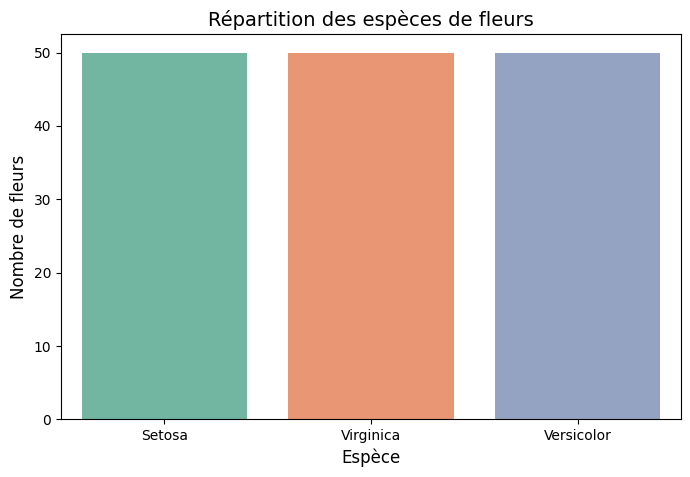

In [ ]:
# Graphique de répartition des variétés de fleurs

plt.figure(figsize=(8, 5))
sns.countplot(x='Species', data=analyse, palette='Set2', hue='Species')
plt.title('Répartition des espèces de fleurs', fontsize=14)
plt.xlabel('Espèce', fontsize=12)
plt.ylabel('Nombre de fleurs', fontsize=12)
plt.show()



## Distribution des Variables Quantitatives (Boîtes à Moustaches)

Nous utilisons des boîtes à moustaches pour visualiser les distributions des variables quantitatives pour chaque espèce.


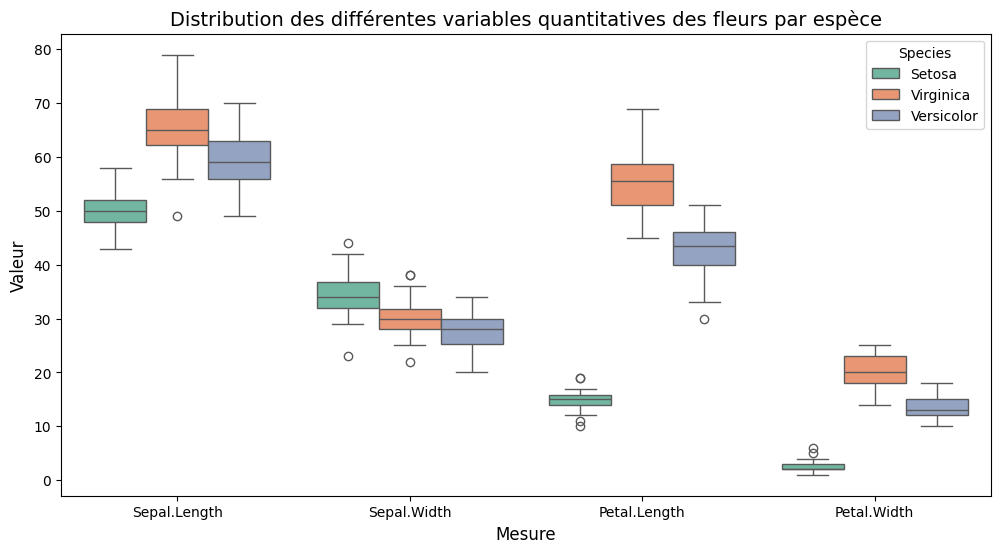

In [ ]:
#vars qualitatives compter le nombre de fleurs de chaque variété et un graphique qui va avec
#toutes les vars quantitatives dans une seule colonne "mesure"
# boite a moustache
data_melted = pd.melt(analyse, id_vars=['Species'], value_vars=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'],
                      var_name='Mesure', value_name='Valeur')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Mesure', y='Valeur', hue='Species', data=data_melted, palette='Set2')

plt.title('Distribution des différentes variables quantitatives des fleurs par espèce', fontsize=14)
plt.xlabel('Mesure', fontsize=12)
plt.ylabel('Valeur', fontsize=12)
plt.show()

# **2. Analyse en Composantes Principales (ACP)**

L'Analyse en Composantes Principales (ACP) est une méthode statistique qui permet de réduire la dimensionnalité des données tout en conservant l'essentiel de l'information. Elle repose sur le calcul des valeurs propres et des vecteurs propres, qui expliquent la variance dans les données.

### Étapes de l'ACP :
1. Normalisation des données.
2. Calcul des composantes principales.
3. Analyse des valeurs propres et des vecteurs propres.
4. Visualisation des valeurs propres (Scree Plot).
5. Extraction des coordonnées des individus et des variables.
6. Calcul de la contribution et de la qualité de représentation.
7. Visualisation des individus et des variables sur le plan factoriel.


### Étape 1 : Normalisation des Données

Pour effectuer une ACP, les données doivent être normalisées. Cela permet de donner à chaque variable une importance équivalente, quelle que soit son échelle.


In [ ]:
quantitative_data = analyse[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(quantitative_data)

### Étape 2 : Calcul des Composantes Principales

Nous utilisons la classe `PCA` de `sklearn` pour calculer les composantes principales. Cela inclut :
- Les valeurs propres, qui expliquent la proportion de variance représentée par chaque composante.
- Les vecteurs propres, qui indiquent la contribution de chaque variable à une composante principale.


In [ ]:
# Effectuer l'ACP
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Extraire les valeurs propres
valeurs_propres = pca.explained_variance_
# Extraire les vecteurs propres
vecteurs_propres = pca.components_

print("Valeurs propres :")
print(valeurs_propres)
print("Vecteurs propres :")
print(vecteurs_propres)

Valeurs propres :
[2.93808505 0.9201649  0.14774182 0.02085386]
Vecteurs propres :
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


### Étape 3 : Visualisation des Valeurs Propres

Un graphique des valeurs propres (Scree Plot) permet de visualiser l'importance de chaque composante principale. Cela aide à choisir combien de composantes conserver.


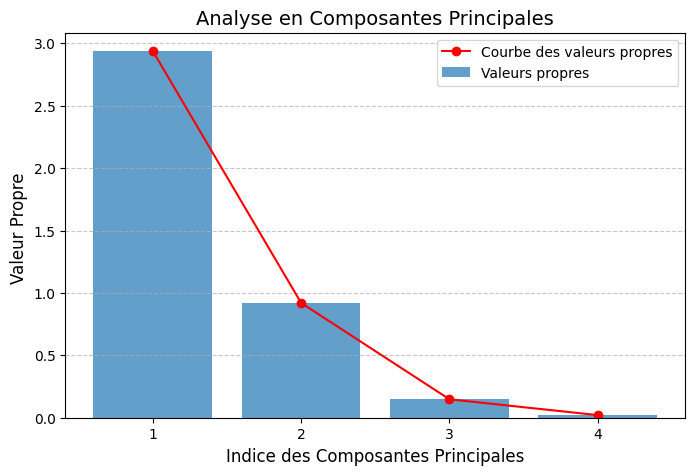

In [ ]:
# graphique des valeurs propres
plt.figure(figsize=(8, 5))

#les valeurs propres
plt.bar(range(1, len(valeurs_propres) + 1), valeurs_propres, alpha=0.7, label='Valeurs propres')
plt.plot(range(1, len(valeurs_propres) + 1), valeurs_propres, marker='o', color='red', label='Courbe des valeurs propres')

plt.title('Analyse en Composantes Principales', fontsize=14)
plt.xlabel('Indice des Composantes Principales', fontsize=12)
plt.ylabel('Valeur Propre ', fontsize=12)
plt.xticks(range(1, len(valeurs_propres) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Étape 4 : Extraction des Coordonnées

- **Coordonnées des individus** : Projection des individus dans l'espace défini par les composantes principales.
- **Coordonnées des variables** : Contribution de chaque variable aux composantes principales.


In [ ]:
# Coordonnées des individus
individual_coordinates = pd.DataFrame(
    principal_components,
    columns=[f'PC{i+1}' for i in range(principal_components.shape[1])]
)

# Coordonnées des variables
variable_coordinates = pd.DataFrame(
    vecteurs_propres.T * np.sqrt(valeurs_propres),
    columns=[f'PC{i+1}' for i in range(vecteurs_propres.shape[0])],
    index=quantitative_data.columns
)



print("\nCoordonnées des points individus :")
print(individual_coordinates.head())  # Afficher les 5 premiers individus

print("\nCoordonnées des variables :")
print(variable_coordinates)


Coordonnées des points individus :
        PC1       PC2       PC3       PC4
0 -2.203833  0.009216  0.153029 -0.049372
1  1.862703 -0.178549 -0.354149 -0.100010
2  1.075475 -0.208421  0.398256 -0.104737
3  2.014810  0.613886 -0.428333 -0.247538
4  1.114148 -0.292923  0.183488  0.186344

Coordonnées des variables :
                   PC1       PC2       PC3       PC4
Sepal.Length  0.893151  0.362039  0.276581 -0.037732
Sepal.Width  -0.461684  0.885673 -0.093934  0.017836
Petal.Length  0.994877  0.023494 -0.054629  0.115736
Petal.Width   0.968212  0.064214 -0.243797 -0.075612


### Étape 5 : Contribution et Qualité de Représentation

Nous calculons :
1. **Contribution des individus** : Quelle proportion de chaque composante est expliquée par chaque individu.
2. **Qualité de représentation des individus** (cos²) : Quelle proportion de la variance d’un individu est expliquée par une composante.
3. **Contribution des variables** : Importance de chaque variable pour chaque composante.
4. **Qualité de représentation des variables** (cos²) : Quelle proportion de la variance d’une variable est expliquée par une composante.


In [ ]:
# Calcul de la contribution pour les individus
coord_individus = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
total_inertia = np.sum(valeurs_propres)

# Contribution des individus
contribution_individus = (coord_individus**2).div(valeurs_propres, axis=1) * 100 / len(quantitative_data)

# Qualité de représentation des individus
distance_individus = np.sum(coord_individus**2, axis=1)
cos2_individus = (coord_individus**2).div(distance_individus, axis=0)

# Calcul de la contribution pour les variables
coord_variables = pd.DataFrame(vecteurs_propres.T * np.sqrt(valeurs_propres),
                                columns=[f'PC{i+1}' for i in range(vecteurs_propres.shape[0])],
                                index=quantitative_data.columns)

# Contribution des variables
contribution_variables = (vecteurs_propres.T**2).T * valeurs_propres / total_inertia * 100
contribution_variables = pd.DataFrame(contribution_variables,
                                       columns=[f'PC{i+1}' for i in range(vecteurs_propres.shape[0])],
                                       index=quantitative_data.columns)

# Qualité de représentation des variables
cos2_variables = vecteurs_propres**2
cos2_variables = pd.DataFrame(cos2_variables,
                              columns=[f'PC{i+1}' for i in range(vecteurs_propres.shape[0])],
                              index=quantitative_data.columns)

# Afficher les résultats
print("Contribution des individus :")
print(contribution_individus.head())  # Afficher les 5 premiers individus

print("\nQualité de représentation des individus :")
print(cos2_individus.head())

print("\nContribution des variables :")
print(contribution_variables)

print("\nQualité de représentation des variables :")
print(cos2_variables)

Contribution des individus :
        PC1       PC2       PC3       PC4
0  1.102052  0.000062  0.105671  0.077925
1  0.787285  0.023097  0.565948  0.319748
2  0.262449  0.031472  0.715697  0.350688
3  0.921113  0.273035  0.827881  1.958877
4  0.281663  0.062165  0.151923  1.110073

Qualité de représentation des individus :
        PC1       PC2       PC3       PC4
0  0.994687  0.000017  0.004796  0.000499
1  0.953999  0.008766  0.034485  0.002750
2  0.844475  0.031715  0.115800  0.008009
3  0.867210  0.080506  0.039194  0.013090
4  0.889507  0.061485  0.024126  0.024882

Contribution des variables :
                    PC1        PC2       PC3       PC4
Sepal.Length  19.810011   1.657778  1.235984  0.165233
Sepal.Width   10.393067  19.479700  0.002201  0.002321
Petal.Length  37.778184   1.364704  0.074112  0.208340
Petal.Width    4.981184   0.348580  2.356625  0.141976

Qualité de représentation des variables :
                   PC1       PC2       PC3       PC4
Sepal.Length  0.271510 

### Étape 6 : Visualisation des Individus et Variables

Nous représentons graphiquement :
1. Les individus dans le plan factoriel (PC1 vs PC2).
2. Les variables sous forme de flèches pour montrer leur contribution aux composantes principales.


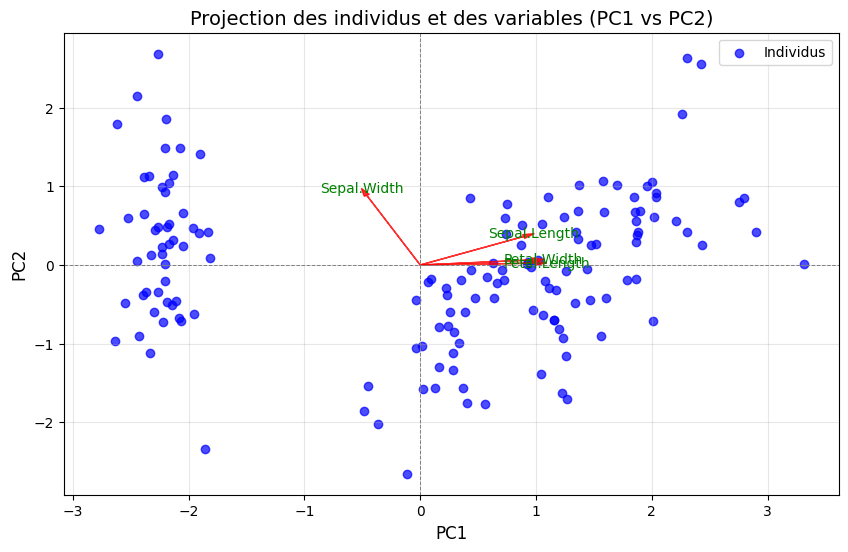

In [ ]:
plt.figure(figsize=(10, 6))

# Ajouter les individus (points)
plt.scatter(coord_individus['PC1'], coord_individus['PC2'], alpha=0.7, c='blue', label='Individus')

# Ajouter les flèches pour les variables
for var in variable_coordinates.index:
    plt.arrow(0, 0,
              variable_coordinates.loc[var, 'PC1'],
              variable_coordinates.loc[var, 'PC2'],
              color='red', alpha=0.8, head_width=0.05, head_length=0.1)
    plt.text(variable_coordinates.loc[var, 'PC1'] * 1.1,
             variable_coordinates.loc[var, 'PC2'] * 1.1,
             var, color='green', fontsize=10, ha='center', va='center')

plt.title('Projection des individus et des variables (PC1 vs PC2)', fontsize=14)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# **3. Classification Ascendante Hiérarchique (CAH)**

Nous appliquons la méthode de Ward pour regrouper les individus et affichons le dendrogramme correspondant.


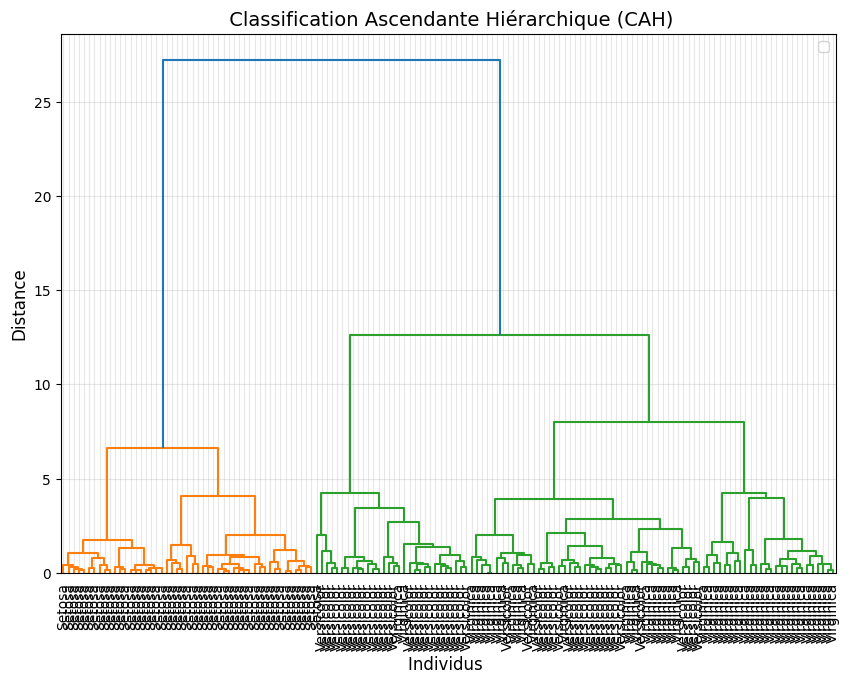

In [ ]:
# Calcul des distances et application de la méthode de Ward
linked = linkage(scaled_data, method='ward')

# Création du dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=analyse['Species'].values, leaf_rotation=90, leaf_font_size=10)
plt.title(' Classification Ascendante Hiérarchique (CAH)', fontsize=14)
plt.xlabel('Individus ', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()



# **4. Classification par K-Means**

Le K-Means est une méthode de regroupement qui attribue chaque individu à l'un des \(k\) clusters.


Centres des clusters :
[[-0.07723421 -0.93062132  0.32313817  0.23727821]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.06889068  0.05759433  0.96893325  1.00231456]]


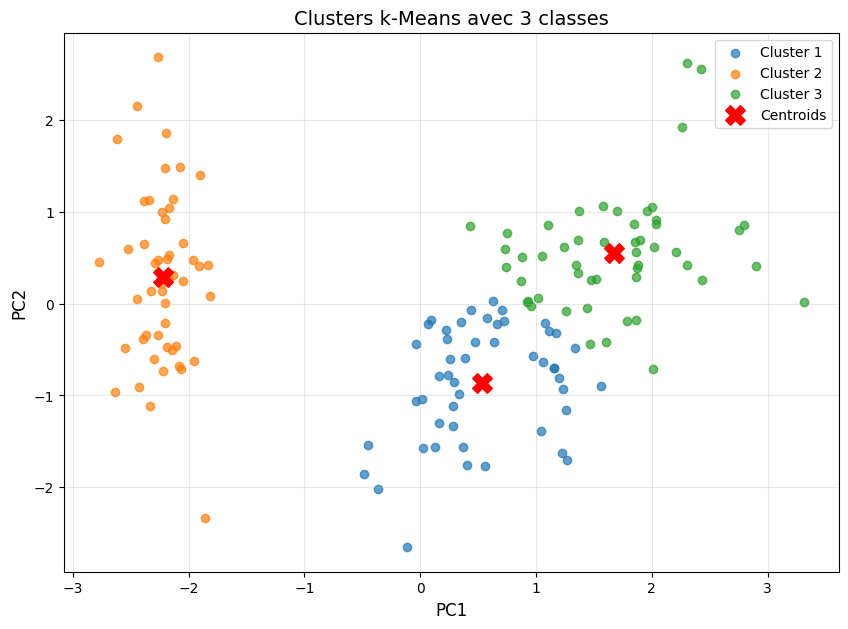

      Species  Cluster
0      Setosa        1
1   Virginica        2
2  Versicolor        0
3   Virginica        2
4   Virginica        0


In [ ]:
# Appliquer k-Means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Ajouter la colonne de clusters au DataFrame
analyse['Cluster'] = kmeans.labels_

# Afficher les centres des clusters
print("Centres des clusters :")
print(kmeans.cluster_centers_)

# Visualisation des clusters sur le premier plan principal (PC1 vs PC2 de l'ACP)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))

# Visualisation des points par clusters
for cluster in np.unique(kmeans.labels_):
    cluster_data = principal_components[kmeans.labels_ == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}', alpha=0.7)

# Afficher les centres des clusters sur le graphique
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('Clusters k-Means avec 3 classes', fontsize=14)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Afficher les résultats de la classification
print(analyse[['Species', 'Cluster']].head())

## Commentaires sur les Résultats

### Centres des Clusters
Les centres des clusters (dans l'espace normalisé) montrent les moyennes des variables pour chaque groupe. Cela permet de comprendre les caractéristiques principales des individus appartenant à chaque cluster.

### Visualisation
Les clusters sont bien séparés dans l'espace des deux premières composantes principales. Cela montre que les variables quantitatives utilisées (longueur/largeur des sépales et pétales) permettent une bonne séparation des individus.

### Comparaison avec les Espèces
En comparant les clusters avec les espèces réelles (`Species`), vous pouvez évaluer la qualité de la classification.  
Par exemple, les individus d'une certaine espèce comme **Iris Setosa** pourraient être bien regroupés dans un cluster unique, tandis que les autres espèces (Versicolor et Virginica) pourraient être plus difficiles à séparer.


In [ ]:
# Comparer les clusters avec les espèces
print("Comparaison entre les clusters et les espèces :")
print(pd.crosstab(analyse['Species'], analyse['Cluster']))


Comparaison entre les clusters et les espèces :
Cluster      0   1   2
Species               
Setosa       0  50   0
Versicolor  38   0  12
Virginica   11   0  39
